In [2]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAPL (2).csv')
df.head()

,Date,Open,High,Low,eps,p/e,Interest_Rate,Inflation_rate,Close,Adj Close,Volume
0,1/3/2000,0.936384,1.004464,0.907924,11.324009,18.149305,3.411051,1.760000,0.999442,0.853355,535796800
1,1/4/2000,0.966518,0.987723,0.903460,9.778793,17.445471,2.796146,2.488276,0.915179,0.781409,512377600
2,1/5/2000,0.926339,0.987165,0.919643,9.422680,17.327946,2.795518,2.488011,0.928571,0.792844,778321600
3,1/6/2000,0.947545,0.955357,0.848214,7.335150,22.874871,2.794891,2.487746,0.848214,0.724232,767972800
4,1/7/2000,0.861607,0.901786,0.852679,26.008772,2.198084,2.794264,2.487482,0.888393,0.758538,460734400


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,eps,p/e,Interest_Rate,Inflation_rate,Close,Adj Close,Volume
Date,,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,11.324009,18.149305,3.411051,1.760000,0.999442,0.853355,535796800
1/4/2000,0.966518,0.987723,0.903460,9.778793,17.445471,2.796146,2.488276,0.915179,0.781409,512377600
1/5/2000,0.926339,0.987165,0.919643,9.422680,17.327946,2.795518,2.488011,0.928571,0.792844,778321600
1/6/2000,0.947545,0.955357,0.848214,7.335150,22.874871,2.794891,2.487746,0.848214,0.724232,767972800
1/7/2000,0.861607,0.901786,0.852679,26.008772,2.198084,2.794264,2.487482,0.888393,0.758538,460734400


In [24]:
df.index[0]

0

In [88]:
df["Close"].head()

Date
1/3/2000    0.999442
1/4/2000    0.915179
1/5/2000    0.928571
1/6/2000    0.848214
1/7/2000    0.888393
Name: Close, dtype: float64

In [89]:
# df["Close"] = df["Close"].str.replace(",","")
#  = df["Close"].apply(lambda x: float(x))
# df["Close"]=df["Close"].apply(pd.to_numeric)

In [6]:
df["Close"] = df["Close"].astype(str).str.replace(",","")
close = df["Close"].apply(lambda x: float(x))
df["Close"]=df["Close"].apply(pd.to_numeric)

In [7]:
df["Open"] = df["Open"].astype(str).str.replace(",","")
open = df["Close"].apply(lambda x: float(x))

In [8]:
df["High"] = df["High"].astype(str).str.replace(",","")
high = df["High"].apply(lambda x: float(x))

In [9]:
df["Low"] = df["Low"].astype(str).str.replace(",","")
low = df["Low"].apply(lambda x: float(x))

In [10]:
df["Adj Close"] = df["Adj Close"].astype(str).str.replace(",","")
adjclose = df["Adj Close"].apply(lambda x: float(x))

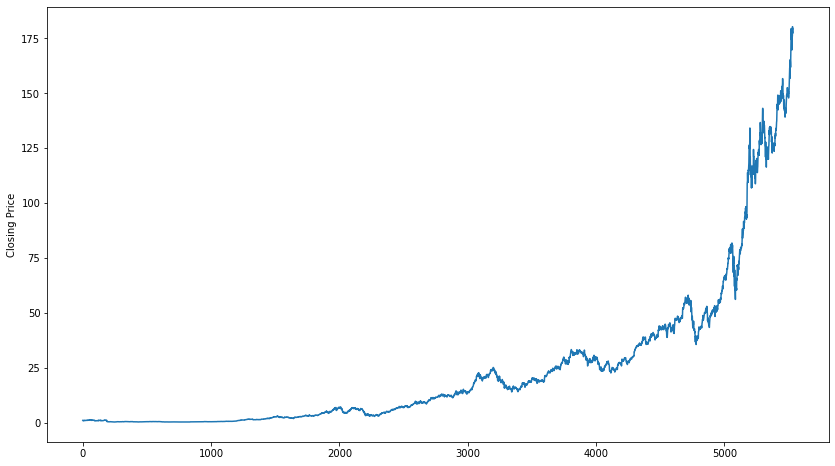

In [11]:
df['Close'].plot(figsize=(14,8))
plt.ylabel("Closing Price")
plt.show()

**Data Pre-processing**

In [12]:
df.isna().sum() 

Date              0
Open              0
High              0
Low               0
eps               1
p/e               4
Interest_Rate     0
Inflation_rate    0
Close             0
Adj Close         0
Volume            0
dtype: int64

In [13]:
df["Close"].value_counts()

0.267857      6
0.348214      6
0.265179      5
0.262500      4
0.256429      4
             ..
3.478571      1
3.638929      1
3.498214      1
3.717143      1
177.570007    1
Name: Close, Length: 5057, dtype: int64

In [14]:
df.value_counts()

Date       Open        High        Low         eps          p/e        Interest_Rate  Inflation_rate  Close       Adj Close   Volume   
1/10/2000  0.910714    0.912946    0.845982    38.964912    1.032386   2.793637       2.487217        0.872768    0.745197    505064000    1
6/10/2004  0.539286    0.553036    0.539286    5000.073022  21.130797  2.146180       2.232187        0.548929    0.468693    257577600    1
6/10/2015  31.98       32.334999   31.9625     30.123400    16.608423  0.949118       1.930307        32.220001   29.287252   156349200    1
6/10/2014  23.682501   23.762501   23.3925     2.696854     7.402150   1.033347       1.938018        23.562500   21.048422   251108000    1
6/10/2013  15.883214   16.03857    15.6        743.428571   0.175382   0.712820       2.260000        15.674643   13.670949   450153200    1
                                                                                                                                          ..
12/9/2020  124.529

In [15]:
df.head()

,Date,Open,High,Low,eps,p/e,Interest_Rate,Inflation_rate,Close,Adj Close,Volume
0,1/3/2000,0.936384,1.004464,0.907924,11.324009,18.149305,3.411051,1.760000,0.999442,0.853355,535796800
1,1/4/2000,0.966518,0.987723,0.90346,9.778793,17.445471,2.796146,2.488276,0.915179,0.781409,512377600
2,1/5/2000,0.926339,0.987165,0.919643,9.422680,17.327946,2.795518,2.488011,0.928571,0.792844,778321600
3,1/6/2000,0.947545,0.955357,0.848214,7.335150,22.874871,2.794891,2.487746,0.848214,0.724232,767972800
4,1/7/2000,0.861607,0.901786,0.852679,26.008772,2.198084,2.794264,2.487482,0.888393,0.758538,460734400


In [16]:
df.drop("Volume", axis=1, inplace=True)

In [101]:
df.head()

,Open,High,Low,eps,p/e,Interest_Rate,Inflation_rate,Close,Adj Close
Date,,,,,,,,,
1/3/2000,0.936384,1.004464,0.907924,11.324009,18.149305,3.411051,1.760000,0.999442,0.853355
1/4/2000,0.966518,0.987723,0.90346,9.778793,17.445471,2.796146,2.488276,0.915179,0.781409
1/5/2000,0.926339,0.987165,0.919643,9.422680,17.327946,2.795518,2.488011,0.928571,0.792844
1/6/2000,0.947545,0.955357,0.848214,7.335150,22.874871,2.794891,2.487746,0.848214,0.724232
1/7/2000,0.861607,0.901786,0.852679,26.008772,2.198084,2.794264,2.487482,0.888393,0.758538


In [ ]:
df.isna().sum()

**Feature Selection**

In [ ]:
df.tail()

In [104]:
x = df.iloc[:, 0:4400].values



In [105]:
x

array([['0.936384', '1.004464', '0.907924', ..., 1.76, 0.999442,
        '0.853355'],
       ['0.966518', '0.987723', '0.90346', ..., 2.48827564, 0.915179,
        '0.781409'],
       ['0.926339', '0.987165', '0.919643', ..., 2.488010875, 0.928571,
        '0.792844'],
       ...,
       ['179.330002', '180.630005', '178.139999', ..., 1.97776447,
        179.380005, '178.640778'],
       ['179.470001', '180.570007', '178.089996', ..., 1.977844731,
        178.199997, '177.465637'],
       ['178.089996', '179.229996', '177.259995', ..., 1.977925055,
        177.570007, '176.838242']], dtype=object)

In [20]:
y = df.iloc[:, 8].values

In [21]:
df.index[4781]

4781

x is holding values for the open, high, low, close, Adj Close columns and y is holding the value of Adj Close columns

Divide the dataset into train and test

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)

In [109]:
#Scaling the features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Hyperparameter Tuning
For a random forest regression model, we are considering the follwing parameters:

n_estimators — number of trees in the forest <br>
max_depth — maximum depth in a tree <br>
min_samples_split — minimum number of data points before the sample is split <br>
min_samples_leaf — minimum number of leaf nodes that are required to be sampled <br>
bootstrap — sampling for data points, true or false <br>
random_state — generated random numbers for the random forest. <br>

In [110]:
# grid_rf = {
# 'n_estimators': [20, 50, 100, 500, 1000],  
# 'max_depth': np.arange(1, 15, 1),  
# 'min_samples_split': [2, 10, 9], 
# 'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
# 'bootstrap': [True, False], 
# 'random_state': [1, 2, 30, 42]
# }
# rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=10, n_jobs=-1, verbose=2, n_iter=200)
# rscv_fit = rscv.fit(X_train, y_train)
# best_parameters = rscv_fit.best_params_
# print(best_parameters)

Apply model and Predict

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=30, min_samples_split=2, min_samples_leaf=1, max_depth=12, bootstrap=True)
model.fit(X_train, y_train)
predict = model.predict(X_test)

NameError: ignored

In [ ]:
print(predict)

In [ ]:
print(predict.shape)

In [ ]:
import sklearn.metrics as metrics

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 5))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 5))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 5))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 5))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
#errors = abs(predict-float(y_test)
             
#mape=100*(errors / y_test)
             
#mape = np.mean(np.abs(predict-float(y_test)/y_test)*100
             
             
#accuracy = 100 - np.mean(mape)
               
#print('Accuracy:', round(accuracy, 2), '%.') 
#accuracy=round (100 - np.mean(mape),2)
               
#accuracy=round (100 - np.mean(mape),2)

#print('Accuracy:', round(accuracy, 2), '%.') 


In [ ]:
df.index

In [ ]:
df.index[0]

In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))

In [ ]:
predictions

In [ ]:
thirtydays_df_pred = pd.DataFrame(predictions[:30])

In [ ]:
thirtydays_df_pred 